In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split


In [14]:
#df_raw = pd.read_csv('heights.csv') #hay que borrar la columna de los index, si no ejecutar index_col=0
df_raw = pd.read_csv('heights.csv', index_col=0)


In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 1 to 1050
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     1050 non-null   object 
 1   height  1050 non-null   float64
dtypes: float64(1), object(1)
memory usage: 24.6+ KB


In [15]:
df_raw.sample(10)

,sex,height
934,Female,69.0
606,Male,69.0
33,Female,67.0
86,Male,70.0
173,Male,72.0
975,Male,66.0
422,Male,71.5
232,Male,69.0
487,Male,72.0
292,Male,70.0


In [16]:
#Transform to cm
df_raw['height']= df_raw['height']*2.54

In [19]:
#copy df_raw to df to preserve original data
df = df_raw.copy()

In [21]:
df.describe()

,height
count,1050.000000
mean,173.540454
std,10.359687
min,127.000000
25%,167.640000
50%,173.990000
75%,180.340000
max,210.000000


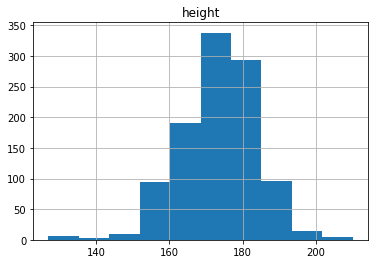

In [23]:
df.hist()
plt.show()

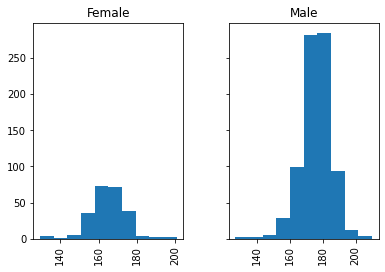

In [26]:
df.hist(by='sex',sharey=True)
plt.show()

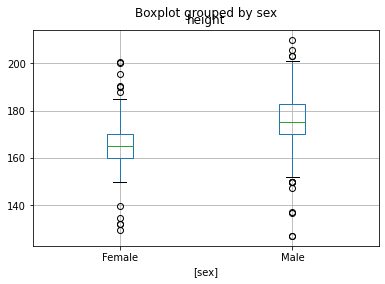

In [29]:
df.boxplot(by='sex')
plt.show()

In [35]:
# Pronosticar el sexo en base a la estatura // Predict gender based on height
# Primer algoritmo para pronosticar adivinando
# Separamos en dataset: uno para train y otro para test
#chicos 75 - 25
# grandes 90 -10

X_train, X_test, y_train, y_test = train_test_split(df['height'],df['sex'], test_size=0.25,random_state=53)


In [36]:
# Algoritmo de la adivinanza
y_hat_guess = np.random.choice(['Female','Male'],len(X_train))
y_hat_guess

array(['Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male',
       'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Femal

In [37]:
# Quisero saber cuantas veces acerté el pronóstico  (accuracy)
np.mean(y_train == y_hat_guess) 

0.49682337992376113

In [38]:
df_train = pd.DataFrame({'height':X_train,'sex':y_train})
df_train.groupby('sex')['height'].agg(['mean','std'])

,mean,std
sex,,
Female,164.466047,9.193325
Male,176.118109,9.540305


In [39]:
# 176.12 - (2 * 9.54) para los hombre 157.04 -- 96% valores regla de decision
y_hat_sd = df_train['height'].apply(lambda x: 'Male' if x > 157 else 'Female')

In [ ]:
# Calculamos la precisión para este caso
np.mean(y_train == y_hat_sd)

0.7738246505717916

In [43]:
my_list=[]
for i in range(155,179):
    y_hat_cut = df_train['height'].apply(lambda x: 'Male' if x > i else 'Female')
    my_list.append(np.mean(y_train==y_hat_cut))

print(my_list)
print(max(my_list))


[0.7776365946632783, 0.7763659466327827, 0.7738246505717916, 0.7890724269377383, 0.7928843710292249, 0.7928843710292249, 0.8094027954256671, 0.8081321473951716, 0.829733163913596, 0.8335451080050826, 0.8360864040660737, 0.8233799237611181, 0.8233799237611181, 0.8055908513341804, 0.795425667090216, 0.7814485387547649, 0.7382465057179162, 0.7331639135959339, 0.6823379923761118, 0.6683608640406608, 0.6632782719186785, 0.5972045743329097, 0.5921219822109276, 0.5184243964421855]
0.8360864040660737


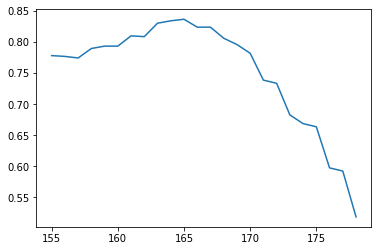

In [44]:
my_x = range(155,179)
plt.plot(my_x,my_list)
plt.show()

In [46]:
# Obtengo el índice en el cual está el máximo porcentaje de probabilidad
my_x[my_list.index(max(my_list))]

165